In [ ]:
# Colab library to upload files to notebook
from google.colab import files
!pip install -q kaggle

In [ ]:

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 1.14G/1.15G [00:13<00:00, 125MB/s]
100% 1.15G/1.15G [00:13<00:00, 89.5MB/s]


In [ ]:
!unzip covid19-radiography-database.zip

Archive:  covid19-radiography-database.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (109).png  
  inflating: COV

In [ ]:
import glob

In [ ]:
covid = glob.glob("database/COVID-19/*.png")
normal = glob.glob("database/NORMAL/*.png")

In [ ]:
print(len(covid), len(normal))

219 1341


In [ ]:
LR = 0.001
EPOCHS = 30
BATCH_SIZE = 32
COVID_LEN = 219
INP_SIZE = (224,224,3)

In [ ]:
import cv2
import os, glob
import numpy as np
import seaborn as sns
from imutils import paths
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, Xception,VGG19,InceptionResNetV2,ResNet50V2,InceptionV3,MobileNetV2,MobileNet
from tensorflow.keras.layers import Input, Dense, Flatten, AveragePooling2D, Dropout, BatchNormalization, Conv2D, MaxPooling2D,Activation,add

In [ ]:
def create_data(dir_name):
    temp_data = []
    img_list = glob.glob(dir_name + '/*')
    print(len(img_list))
    for img in img_list[:COVID_LEN]:
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        temp_data.append(image)
    return temp_data

data = []
labels = []

covid_dir = 'database/COVID-19'
normal_dir = 'database/NORMAL'
pneumonia_dir = 'database/Viral Pneumonia'
data.extend(create_data(covid_dir))
data.extend(create_data(normal_dir))
data.extend(create_data(pneumonia_dir))

219
1341
1345


In [ ]:
labels.extend([1] * COVID_LEN)
labels.extend([0]*2*COVID_LEN)

In [ ]:
data = np.array(data)/255.0
labels = np.array(labels)

print(data.shape)
print(labels.shape)

(657, 224, 224, 3)
(657,)


In [ ]:
%matplotlib inline

In [ ]:
covid_sample_imgs = glob.glob("database/COVID-19/*")[40:44]
nonCovid_sample_imgs = glob.glob("database/NORMAL/*")[0:4]
pneumonia_dir_imgs = glob.glob("database/Viral Pneumonia/*")[12:16]

In [ ]:
import matplotlib.image as mpimg

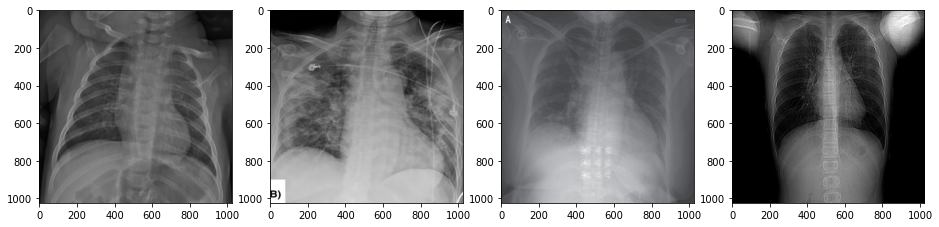

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(covid_sample_imgs):
    plt.subplot(len(covid_sample_imgs) / columns + 1, columns, i + 1)
    plt.imshow(mpimg.imread(image))

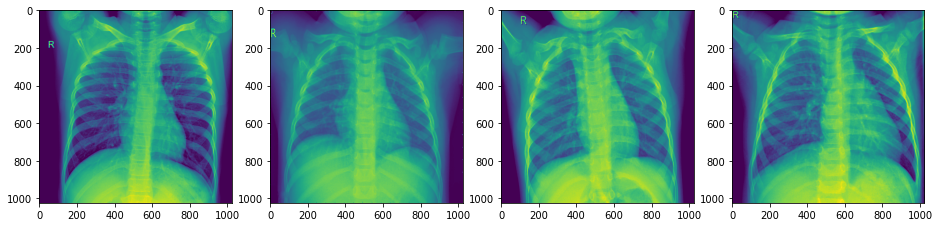

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(nonCovid_sample_imgs):
    plt.subplot(len(nonCovid_sample_imgs) / columns + 1, columns, i + 1)
    plt.imshow(mpimg.imread(image))

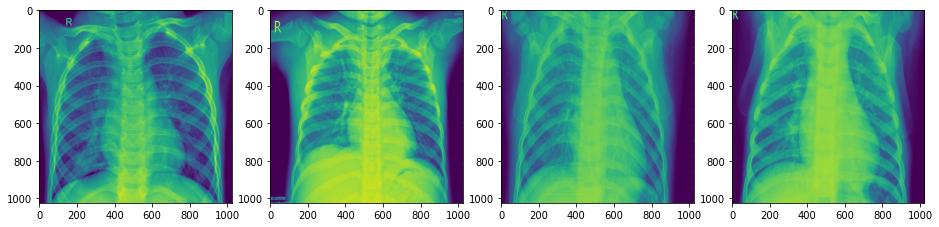

In [ ]:
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(pneumonia_dir_imgs):
    plt.subplot(len(pneumonia_dir_imgs) / columns + 1, columns, i + 1)
    plt.imshow(mpimg.imread(image))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=15, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
IMG_DIM = (224, 224)
from keras.preprocessing import image
samples = glob.glob(covid_dir + '/*')
train_imgs = [image.img_to_array(image.load_img(img, target_size=IMG_DIM)) for img in samples]


In [ ]:
train_labels = ["COVID" for fn in train_imgs]

In [ ]:
train_imgs = np.array(train_imgs)

Labels: ['COVID', 'COVID', 'COVID', 'COVID', 'COVID']


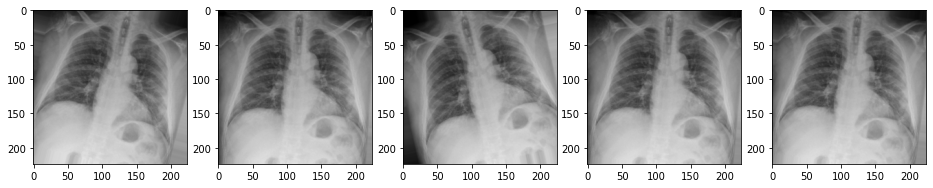

In [ ]:
img_id = 0
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

(x_train, x_test, y_train, y_test) = train_test_split(
    data,
    labels,
    test_size=0.20,
    stratify=labels,
    random_state=42
)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest"
)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(525, 224, 224, 3)
(525, 2)
(132, 224, 224, 3)
(132, 2)


In [ ]:
def display_history(history_):
    fig, ax = plt.subplots(1,2, figsize=(12, 3))
    ax[0].plot(history_.history['loss'], color='b', label="training_loss")
    ax[0].plot(history_.history['val_loss'], color='r', label="validation_loss",axes =ax[0])
    ax[0].set_xlabel("Epoch")
    ax[0].set_ylabel("Loss")
    legend = ax[0].legend(loc='best', shadow=True)
    ax[1].plot(history_.history['accuracy'], color='b', label="training_accuracy")
    ax[1].plot(history_.history['val_accuracy'], color='r',label="validation_accuracy")
    ax[1].set_xlabel("Epoch")
    ax[1].set_ylabel("Accuracy")
    legend = ax[1].legend(loc='best', shadow=True)

def plot_metrices(model_):
    plt.figure()
    ax = plt.subplot()
    ax.set_title('Confusion Matrix')
    pred = model_.predict(x_test, batch_size = BATCH_SIZE)
    pred = np.argmax(pred, axis = 1)
    cm = confusion_matrix(y_test.argmax(axis = 1), pred)
    classes=['normal', 'covid19']
    sns.heatmap(cm, annot = True, xticklabels = classes, yticklabels = classes, cmap = 'Reds')

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show

    print(classification_report(y_test.argmax(axis = 1), pred))
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    print("ACC: {:.4f}".format(acc))
    print("Sensitivity: {:.4f}".format(sensitivity))
    print("Specificity: {:.4f}".format(specificity))

Model-1

In [ ]:
## Model-1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=INP_SIZE))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:
history = model.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),
                              steps_per_epoch = len(x_train) // BATCH_SIZE,
                              validation_data = (x_test, y_test),
                              validation_steps = len(x_test) // BATCH_SIZE,
                              epochs = EPOCHS+10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
16/16 [==============================] - 5s 329ms/step - loss: 0.6125 - accuracy: 0.6653 - val_loss: 0.5283 - val_accuracy: 0.6667
Epoch 2/40
16/16 [==============================] - 5s 318ms/step - loss: 0.4576 - accuracy: 0.7992 - val_loss: 0.3411 - val_accuracy: 0.8712
Epoch 3/40
16/16 [==============================] - 5s 323ms/step - loss: 0.3267 - accuracy: 0.8661 - val_loss: 0.2194 - val_accuracy: 0.9242
Epoch 4/40
16/16 [==============================] - 5s 322ms/step - loss: 0.2699 - accuracy: 0.9006 - val_loss: 0.2237 - val_accuracy: 0.9091
Epoch 5/40
16/16 [==============================] - 5s 329ms/step - loss: 0.1820 - accuracy: 0.9229 - val_loss: 0.1529 - val_accuracy: 0.9394
Epoch 6/40
16/16 [==============================] - 5s 320ms/step - loss: 0.1924 - accuracy: 0.9229 - val_loss: 0.1431 - val_accuracy: 0.9242
Epoch 7/40
16/16 [==============================] - 5s 323ms/step - loss

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.96      1.00      0.98        44

    accuracy                           0.98       132
   macro avg       0.98      0.99      0.98       132
weighted avg       0.99      0.98      0.98       132

ACC: 0.9848
Sensitivity: 0.9773
Specificity: 1.0000


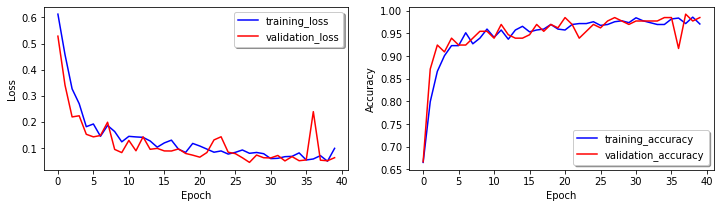

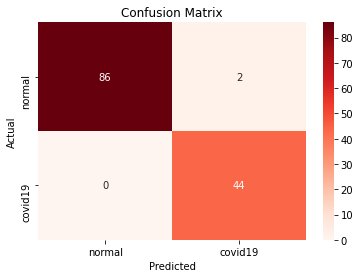

In [ ]:
display_history(history)
plot_metrices(model)

In [ ]:
history2 = ""

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc(model_, name):
    plt.figure()
    ax = plt.subplot()
    ax.set_title('ROC Curve')
    pred = model_.predict(x_test).ravel()
    print(pred.size)
    fpr, tpr, thresholds = roc_curve(y_test.ravel(), pred)
    ac = auc(fpr, tpr)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{} (area = {:.3f})'.format(name, ac))
    plt.xlabel('False positive rate(100-Specificity)')
    plt.ylabel('True positive rate(Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show

264


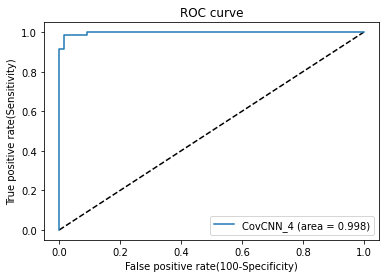

In [ ]:
plot_roc(model,"CovCNN_4")

In [ ]:
### Model-2

model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu',input_shape=INP_SIZE))
model2.add(MaxPooling2D((3, 3)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D((3, 3)))
model2.add(Flatten())
model2.add(Dropout(0.3))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(2, activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 33856)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

Epoch 1/40
16/16 [==============================] - 5s 301ms/step - loss: 0.6047 - accuracy: 0.6471 - val_loss: 0.4694 - val_accuracy: 0.7803
Epoch 2/40
16/16 [==============================] - 4s 280ms/step - loss: 0.4561 - accuracy: 0.7972 - val_loss: 0.4569 - val_accuracy: 0.8636
Epoch 3/40
16/16 [==============================] - 4s 278ms/step - loss: 0.3751 - accuracy: 0.8438 - val_loss: 0.2696 - val_accuracy: 0.9167
Epoch 4/40
16/16 [==============================] - 4s 279ms/step - loss: 0.2870 - accuracy: 0.8884 - val_loss: 0.2414 - val_accuracy: 0.8864
Epoch 5/40
16/16 [==============================] - 4s 281ms/step - loss: 0.2530 - accuracy: 0.8986 - val_loss: 0.2084 - val_accuracy: 0.9318
Epoch 6/40
16/16 [==============================] - 4s 278ms/step - loss: 0.1958 - accuracy: 0.9229 - val_loss: 0.1782 - val_accuracy: 0.9242
Epoch 7/40
16/16 [==============================] - 5s 282ms/step - loss: 0.2043 - accuracy: 0.9189 - val_loss: 0.3392 - val_accuracy: 0.8636
Epoch 

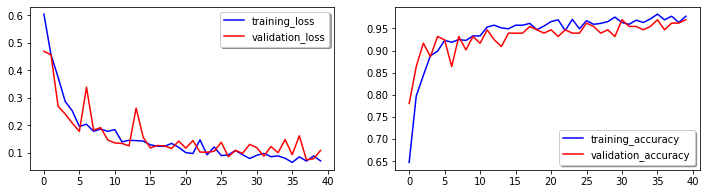

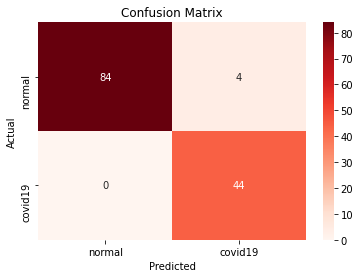

In [ ]:
history2 = model2.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),
                              steps_per_epoch = len(x_train) // BATCH_SIZE,
                              validation_data = (x_test, y_test),
                              validation_steps = len(x_test) // BATCH_SIZE,
                              epochs = EPOCHS+10)
display_history(history2)
plot_metrices(model2)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        88
           1       0.92      1.00      0.96        44

    accuracy                           0.97       132
   macro avg       0.96      0.98      0.97       132
weighted avg       0.97      0.97      0.97       132

ACC: 0.9697
Sensitivity: 0.9545
Specificity: 1.0000


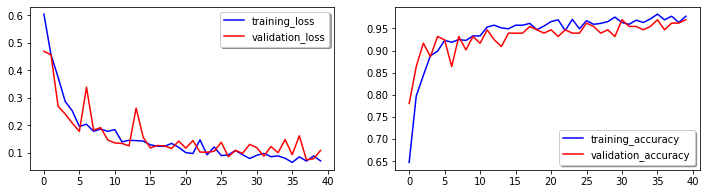

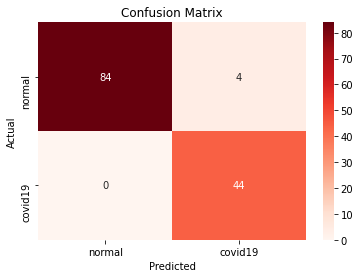

In [ ]:
display_history(history2)
plot_metrices(model2)

In [ ]:
### Model-3
# Cov19net-1
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='relu',input_shape=INP_SIZE))
model3.add(AveragePooling2D((3, 3)))
model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(AveragePooling2D((3, 3)))
model3.add(Flatten())
model3.add(Dropout(0.2))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(2, activation='sigmoid'))
model3.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])



In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
average_pooling2d_8 (Average (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 69, 69, 64)        51264     
_________________________________________________________________
average_pooling2d_9 (Average (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 33856)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)              

Epoch 1/40
16/16 [==============================] - 6s 350ms/step - loss: 0.5738 - accuracy: 0.6978 - val_loss: 0.6339 - val_accuracy: 0.6667
Epoch 2/40
16/16 [==============================] - 5s 311ms/step - loss: 0.4247 - accuracy: 0.8276 - val_loss: 0.3157 - val_accuracy: 0.9167
Epoch 3/40
16/16 [==============================] - 5s 324ms/step - loss: 0.3153 - accuracy: 0.8945 - val_loss: 0.2434 - val_accuracy: 0.9167
Epoch 4/40
16/16 [==============================] - 5s 310ms/step - loss: 0.2956 - accuracy: 0.8884 - val_loss: 0.2293 - val_accuracy: 0.9091
Epoch 5/40
16/16 [==============================] - 5s 325ms/step - loss: 0.2621 - accuracy: 0.8984 - val_loss: 0.2785 - val_accuracy: 0.8788
Epoch 6/40
16/16 [==============================] - 5s 314ms/step - loss: 0.2254 - accuracy: 0.9087 - val_loss: 0.2071 - val_accuracy: 0.9167
Epoch 7/40
16/16 [==============================] - 5s 313ms/step - loss: 0.2303 - accuracy: 0.9148 - val_loss: 0.2150 - val_accuracy: 0.9015
Epoch 

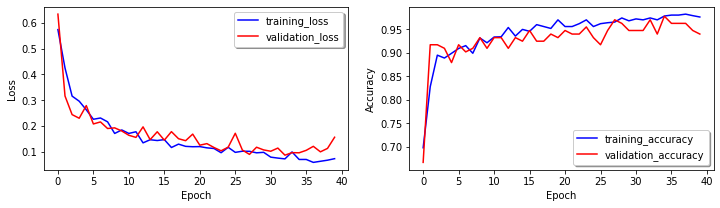

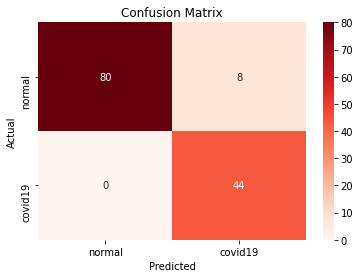

In [ ]:
history3 = model3.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),
                              steps_per_epoch = len(x_train) // BATCH_SIZE,
                              validation_data = (x_test, y_test),
                              validation_steps = len(x_test) // BATCH_SIZE,
                              epochs = EPOCHS+10)
display_history(history3)
plot_metrices(model3)

264


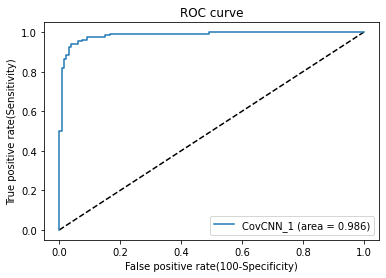

In [ ]:
plot_roc(model3,"CovCNN_1")

In [ ]:
### Model-4
# Cov19net-2
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu',input_shape=INP_SIZE))
model4.add(AveragePooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(AveragePooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dropout(0.2))
model4.add(Dense(256, activation='relu'))
model4.add(Dense(2, activation='softmax'))
model4.compile(loss='categorical_crossentropy',optimizer=Adam(lr = LR, decay = LR/EPOCHS),metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
average_pooling2d_13 (Averag (None, 54, 54, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 186624)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)              

Epoch 1/40
16/16 [==============================] - 5s 329ms/step - loss: 1.8913 - accuracy: 0.7323 - val_loss: 0.2984 - val_accuracy: 0.9091
Epoch 2/40
16/16 [==============================] - 5s 311ms/step - loss: 0.2776 - accuracy: 0.9067 - val_loss: 0.2338 - val_accuracy: 0.8939
Epoch 3/40
16/16 [==============================] - 5s 310ms/step - loss: 0.2007 - accuracy: 0.9229 - val_loss: 0.2859 - val_accuracy: 0.9167
Epoch 4/40
16/16 [==============================] - 5s 319ms/step - loss: 0.2050 - accuracy: 0.9128 - val_loss: 0.2381 - val_accuracy: 0.9091
Epoch 5/40
16/16 [==============================] - 5s 308ms/step - loss: 0.2371 - accuracy: 0.9108 - val_loss: 0.2462 - val_accuracy: 0.9091
Epoch 6/40
16/16 [==============================] - 5s 306ms/step - loss: 0.1775 - accuracy: 0.9310 - val_loss: 0.2046 - val_accuracy: 0.9091
Epoch 7/40
16/16 [==============================] - 5s 308ms/step - loss: 0.1400 - accuracy: 0.9513 - val_loss: 0.1768 - val_accuracy: 0.9318
Epoch 

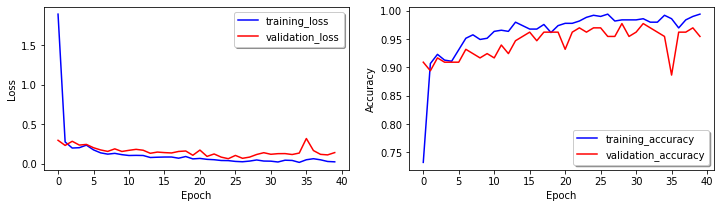

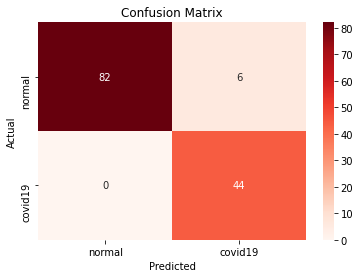

In [ ]:
history4 = model4.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),
                              steps_per_epoch = len(x_train) // BATCH_SIZE,
                              validation_data = (x_test, y_test),
                              validation_steps = len(x_test) // BATCH_SIZE,
                              epochs = EPOCHS+10)
display_history(history4)
plot_metrices(model4)

264


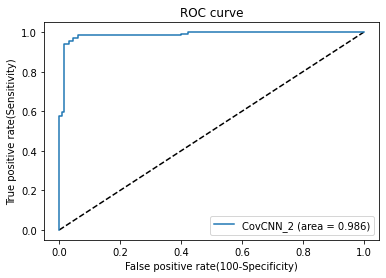

In [ ]:
plot_roc(model4,"CovCNN_2")

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:5]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
test_img = x_train[0]
img_tensor = np.expand_dims(test_img, axis=0)
activations = activation_model.predict(img_tensor)
layer_names = []
for layer in model.layers[:5]:
    layer_names.append(layer.name)
images_per_row = 16


In [ ]:
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
## Model-5
# Cov19net-3
model5 = Sequential()
model5.add(Conv2D(32, (5, 5), activation='relu',input_shape=INP_SIZE))
model5.add(MaxPooling2D((2, 2)))
model5.add(Conv2D(64, (5, 5), activation='relu'))
model5.add(AveragePooling2D((2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dropout(0.3))
model5.add(Dense(128, activation='relu'))
model5.add(Dense(2, activation='sigmoid'))
model5.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:
model5.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 64)      51264     
_________________________________________________________________
average_pooling2d_14 (Averag (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 51, 51, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 40000)            

In [ ]:
history5 = model5.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),steps_per_epoch = len(x_train) // BATCH_SIZE,validation_data = (x_test, y_test),validation_steps = len(x_test) // BATCH_SIZE,epochs = EPOCHS)

Epoch 1/30
16/16 [==============================] - 5s 338ms/step - loss: 0.5962 - accuracy: 0.6653 - val_loss: 0.5018 - val_accuracy: 0.9091
Epoch 2/30
16/16 [==============================] - 5s 325ms/step - loss: 0.4371 - accuracy: 0.8195 - val_loss: 0.3177 - val_accuracy: 0.9167
Epoch 3/30
16/16 [==============================] - 5s 324ms/step - loss: 0.3493 - accuracy: 0.8560 - val_loss: 0.5088 - val_accuracy: 0.7879
Epoch 4/30
16/16 [==============================] - 5s 328ms/step - loss: 0.3046 - accuracy: 0.8986 - val_loss: 0.2378 - val_accuracy: 0.9015
Epoch 5/30
16/16 [==============================] - 5s 321ms/step - loss: 0.2340 - accuracy: 0.9168 - val_loss: 0.2054 - val_accuracy: 0.9242
Epoch 6/30
16/16 [==============================] - 5s 318ms/step - loss: 0.2241 - accuracy: 0.9189 - val_loss: 0.2635 - val_accuracy: 0.8939
Epoch 7/30
16/16 [==============================] - 5s 317ms/step - loss: 0.2086 - accuracy: 0.9168 - val_loss: 0.1960 - val_accuracy: 0.9242
Epoch 

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        88
           1       0.93      0.98      0.96        44

    accuracy                           0.97       132
   macro avg       0.96      0.97      0.97       132
weighted avg       0.97      0.97      0.97       132

ACC: 0.9697
Sensitivity: 0.9659
Specificity: 0.9773


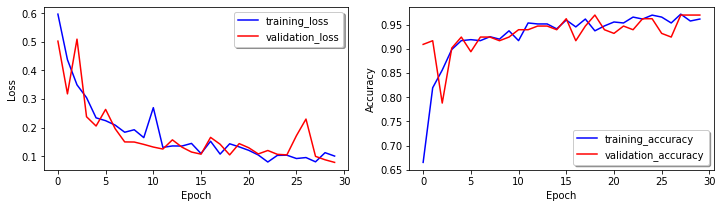

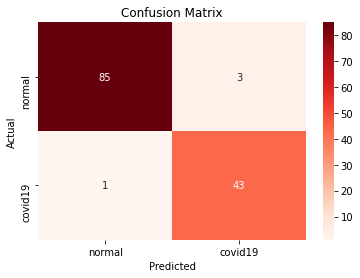

In [ ]:
display_history(history5)
plot_metrices(model5)

264


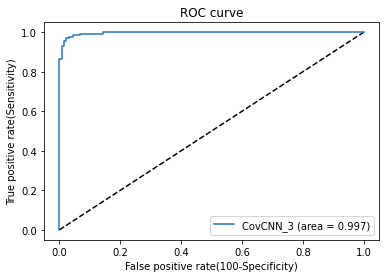

In [ ]:
plot_roc(model5, "CovCNN_3")

In [ ]:
## Model-6
# Cov19net-4
model6 = Sequential()
model6.add(Conv2D(32, (5, 5), activation='relu',input_shape=INP_SIZE))
model6.add(Conv2D(32, (5, 5), activation='relu'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(64, (5, 5), activation='relu',input_shape=INP_SIZE))
model6.add(Conv2D(64, (5, 5), activation='relu'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Conv2D(128, (5, 5), activation='relu',input_shape=INP_SIZE))
model6.add(Conv2D(128, (5, 5), activation='relu'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.3))
model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dense(2, activation='sigmoid'))
model6.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:
model6.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 220, 220, 32)      2432      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 216, 216, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 108, 108, 32)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 104, 104, 64)      51264     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)       

In [ ]:
history6 = model6.fit_generator(trainAug.flow(x_train, y_train, batch_size = BATCH_SIZE),steps_per_epoch = len(x_train) // BATCH_SIZE,validation_data = (x_test, y_test),validation_steps = len(x_test) // BATCH_SIZE,epochs = EPOCHS+10)

Epoch 1/40
16/16 [==============================] - 7s 410ms/step - loss: 0.6803 - accuracy: 0.6247 - val_loss: 0.6705 - val_accuracy: 0.6667
Epoch 2/40
16/16 [==============================] - 6s 353ms/step - loss: 0.6052 - accuracy: 0.6694 - val_loss: 0.5959 - val_accuracy: 0.6667
Epoch 3/40
16/16 [==============================] - 6s 354ms/step - loss: 0.5034 - accuracy: 0.7566 - val_loss: 0.6117 - val_accuracy: 0.6667
Epoch 4/40
16/16 [==============================] - 6s 364ms/step - loss: 0.3920 - accuracy: 0.8600 - val_loss: 0.2748 - val_accuracy: 0.9091
Epoch 5/40
16/16 [==============================] - 6s 350ms/step - loss: 0.3482 - accuracy: 0.8661 - val_loss: 0.2517 - val_accuracy: 0.9167
Epoch 6/40
16/16 [==============================] - 6s 351ms/step - loss: 0.2738 - accuracy: 0.9108 - val_loss: 0.2745 - val_accuracy: 0.9242
Epoch 7/40
16/16 [==============================] - 6s 352ms/step - loss: 0.2600 - accuracy: 0.8986 - val_loss: 0.3494 - val_accuracy: 0.8636
Epoch 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        88
           1       0.88      0.98      0.92        44

    accuracy                           0.95       132
   macro avg       0.93      0.95      0.94       132
weighted avg       0.95      0.95      0.95       132

ACC: 0.9470
Sensitivity: 0.9318
Specificity: 0.9773


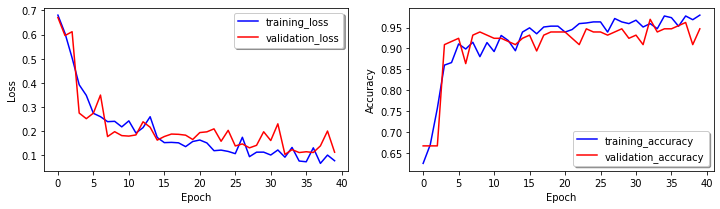

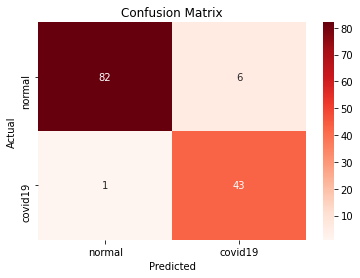

In [ ]:
display_history(history6)
plot_metrices(model6)

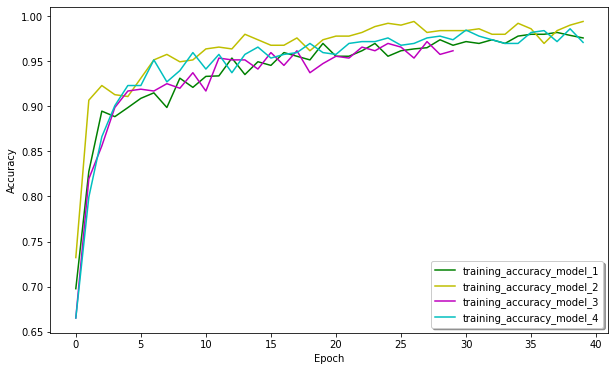

In [ ]:
# ax[1].plot(history_.history['val_accuracy'], color='r',label="validation_accuracy")

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(history3.history['accuracy'], color='g', label="training_accuracy_model_1")
ax.plot(history4.history['accuracy'], color='y', label="training_accuracy_model_2")
ax.plot(history5.history['accuracy'], color='m', label="training_accuracy_model_3")
ax.plot(history.history['accuracy'], color='c', label="training_accuracy_model_4")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
legend = ax.legend(loc='best', shadow=True)

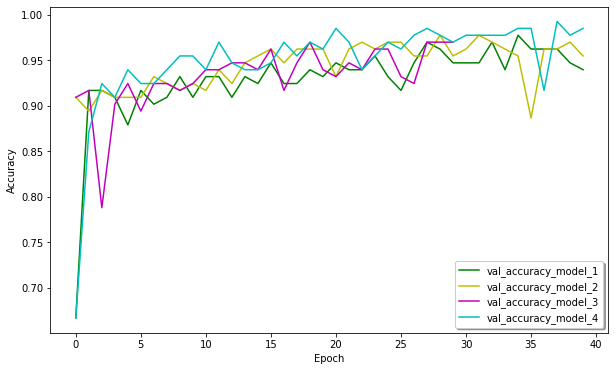

In [ ]:
# ax[1].plot(history_.history['val_accuracy'], color='r',label="validation_accuracy")

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.plot(history3.history['val_accuracy'], color='g', label="val_accuracy_model_1")
ax.plot(history4.history['val_accuracy'], color='y', label="val_accuracy_model_2")
ax.plot(history5.history['val_accuracy'], color='m', label="val_accuracy_model_3")
ax.plot(history.history['val_accuracy'], color='c', label="val_accuracy_model_4")
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
legend = ax.legend(loc='best', shadow=True)

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame({
'group': ['CovCNN_1','CovCNN_2','CovCNN_3','CovCNN_4'],
'Accuracy': [0.9394,0.9470,0.9697,0.9848],
'Sensitivity': [1 , 1, 0.9773, 1],
'Specificity': [0.9091, 0.9318, 0.9659, 0.9773],
'f1-score': [0.93, 0.95, 0.95, 0.98],
})


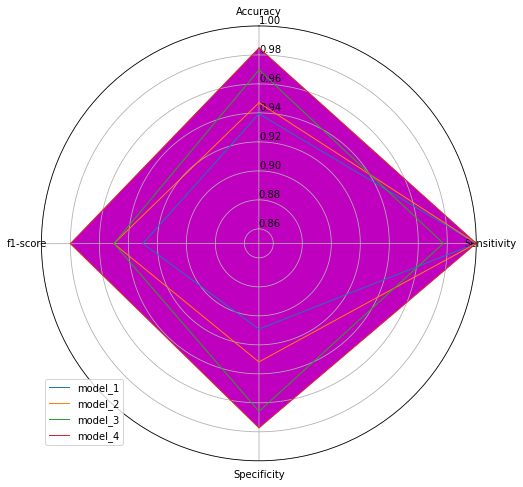

In [ ]:
# ------- PART 1: Create background

# number of variable
categories=list(df)[1:]
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * 3.14 for n in range(N)]
angles += angles[:1]

# Initialise the spider plot
f =  plt.figure(figsize=(15,8))
ax = f.add_subplot(111, polar=True)

# If you want the first axis to be on top:
ax.set_theta_offset(3.14 / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)

# Draw ylabels
ax.set_rlabel_position(0)
# plt.yticks([0.85 ,0.9 ,0.95 ,1], ["0.8" ,"0.9", "0,95" , "1"], color="grey", size=7)
plt.ylim(0.85,1)


# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="model_1")
ax.fill(angles, values, 'b')

# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="model_2")
ax.fill(angles, values, 'r')


# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="model_3")
ax.fill(angles, values, 'g')

# Ind4
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="model_4")
ax.fill(angles, values, 'm')


# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.2, 0.2))
